In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
LEASE = 3000
get_timestamp = lambda time_str: datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S').timestamp()

# Completed Chameleon Lease

In [4]:
completed_lease = pd.read_csv('complete_leases.csv')
start_time = completed_lease[completed_lease['completed']==0]['Time'].iloc[0]
end_time = completed_lease[completed_lease['completed']==LEASE]['Time'].iloc[0]
start_time, end_time

('2021-07-29 16:50:25', '2021-07-29 17:04:55')

# OSG Job Execution Cost

In [5]:
base_osg_jobs = pd.read_csv('osg_jobs.csv')
base_osg_jobs = base_osg_jobs.dropna()
base_osg_jobs = base_osg_jobs[base_osg_jobs['action'] == 'stop']
base_osg_jobs = base_osg_jobs[base_osg_jobs['JobSimCompleteDate'] < get_timestamp(end_time)]
del base_osg_jobs['_id']
base_osg_jobs = base_osg_jobs[(base_osg_jobs['TotalCost'] > 0) & (base_osg_jobs['WastedCost'] >= 0)]

In [6]:
base_osg_jobs.shape

(54984, 27)

In [7]:
base_osg_jobs['ResubmitCount'].value_counts()

0    48119
1     6130
2      651
3       74
4        7
5        3
Name: ResubmitCount, dtype: int64

In [8]:
base_osg_jobs[['TotalCost', 'WastedCost']].describe()

,TotalCost,WastedCost
count,54984.000000,54984.000000
mean,6.183177,0.423759
std,2.577212,1.896713
min,0.001270,0.000000
25%,5.185018,0.000000
50%,6.166580,0.000000
75%,7.227702,0.000000
max,154.132971,151.379685


# Resource Utilization

In [9]:
node_term = pd.read_csv('node_terminations.csv')
node_term['Time'] = pd.to_datetime(node_term['Time'])
node_term = node_term[node_term['Time'] <= end_time]
node_term.dropna(inplace=True)
node_term.max()

Time                     2021-07-29 17:04:55
unused terminations                      733
success termination                     1365
immediate termination                   1374
dtype: object

In [10]:
ru = pd.read_csv('utilization_rate.csv')
ru['Time'] = pd.to_datetime(ru['Time'])
ru = ru[ru['Time'] <= end_time]
ru = ru[ru['Chameleon Utl Rate'] != 0]
ru.set_index(['Time'], inplace=True)

<AxesSubplot:xlabel='Time'>

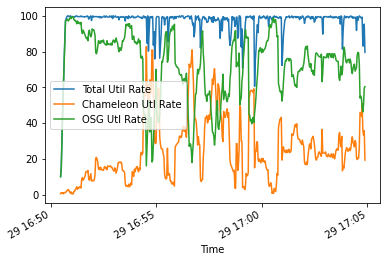

In [11]:
ru.plot()

In [12]:
ru.describe()

,Total Util Rate,Chameleon Utl Rate,OSG Utl Rate
count,432.000000,432.000000,432.000000
mean,96.716898,25.109032,71.952199
std,8.791797,17.451234,18.515700
min,10.300000,0.365000,9.850000
25%,98.275000,13.025000,61.375000
50%,99.300000,22.800000,75.850000
75%,99.600000,33.075000,85.875000
max,100.000000,82.800000,99.600000
